<a href="https://colab.research.google.com/github/vishalraul/Bike-Sharing-Demand-Prediction/blob/main/2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Capstone Project-02(Re)/SeoulBikeData.csv', encoding='latin1')

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#size of the datset
data.shape

(8760, 14)

In [ ]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#data attribute null values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#data columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#covert date columns to date format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
##extraction from datetime
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_name']= data['Date'].dt.day_name()
data['weekdays_weekend'] = data['day_name'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
data.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,day_name,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Thursday,0


In [ ]:
print(min(data['Date']))
print(max(data['Date']))


2017-01-12 00:00:00
2018-12-11 00:00:00


In [ ]:
#drop
#data = data.drop(columns = ['Date','day_of_week'], axis=1)

In [ ]:
#descriptive statastics 
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,15.720548,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,8.796749,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,16.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,23.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000,1.000000


#**Exploratory Data Analysis(EDA)**

# **Seasons**

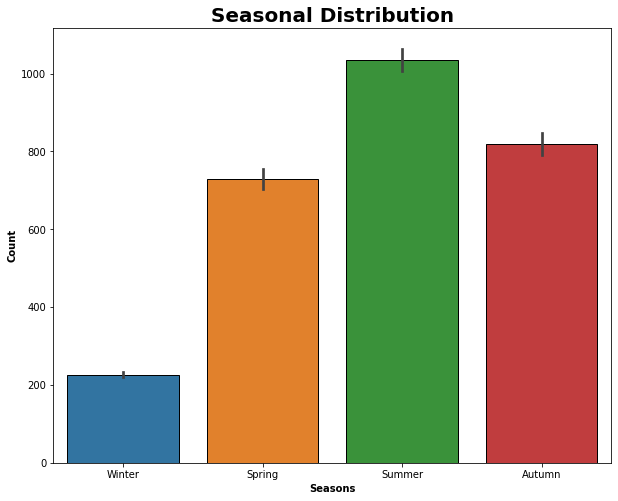

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data['Seasons'], data['Rented Bike Count'], edgecolor='k')
plt.xlabel('Seasons',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Seasonal Distribution', fontweight='bold',fontsize=20)
plt.show()

**From abow graph in Summer season bike has more demand less demand on winter season.**

# **Hour**

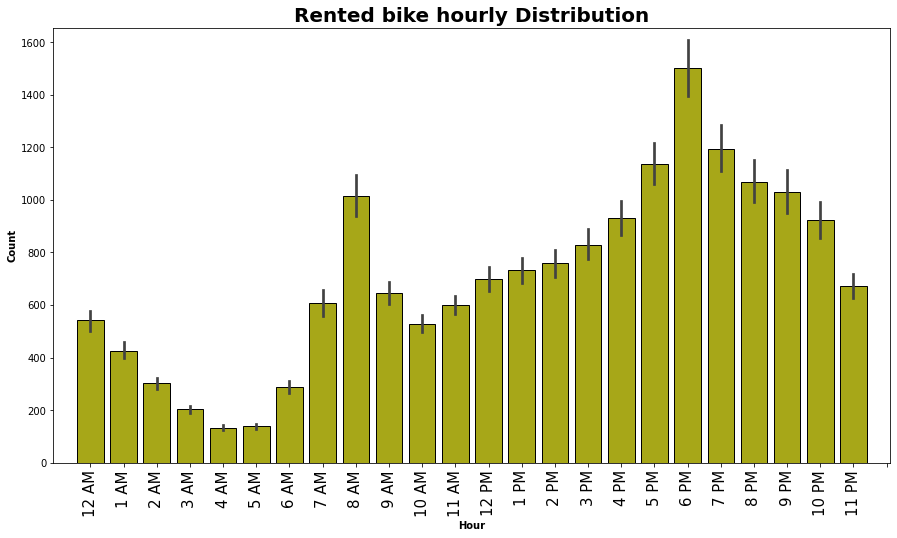

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data['Hour'],data['Rented Bike Count'] ,color='y', edgecolor='k')
plt.xlabel('Hour',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Rented bike hourly Distribution', fontweight='bold',fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], labels=['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM', '9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM', '9 PM','10 PM','11 PM'], fontsize=15, rotation=90)

plt.margins(0.03)
plt.show()

**High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand.**

# **Holiday**

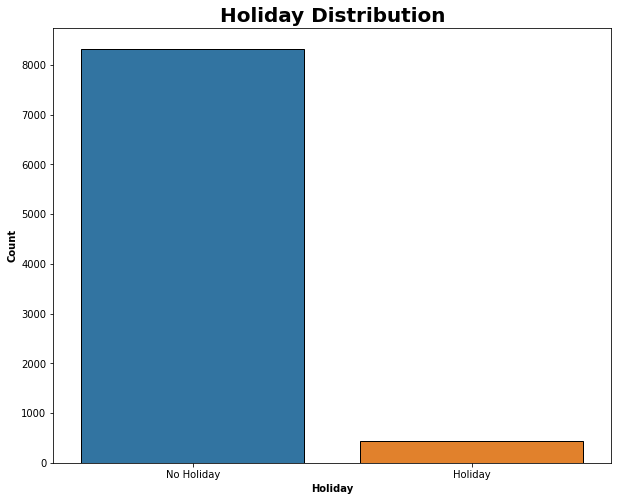

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data['Holiday'], edgecolor='k')
plt.xlabel('Holiday',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Holiday Distribution', fontweight='bold',fontsize=20)
plt.show()

**Bike demand is higher during non holidays.**

## **Month**

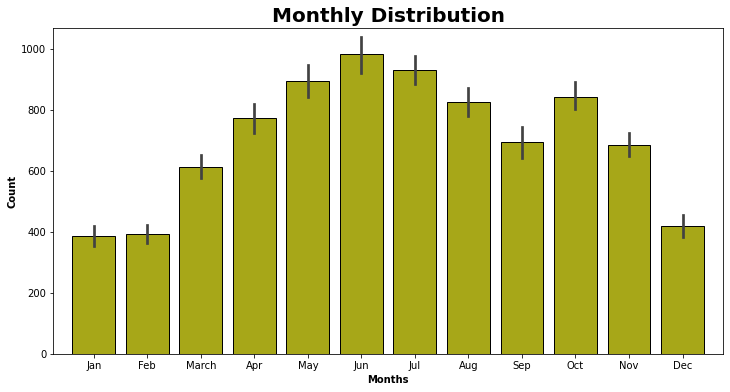

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data['month'],data['Rented Bike Count'] ,color='y', edgecolor='k')
plt.xlabel('Months',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Monthly Distribution', fontweight='bold',fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.margins(0.03)
plt.show()

**we can see that there less demand of Rented bike in the month of December january,February i.e during winter seasons Also demand of bike is maximum during May,june,july i.e Summer**

# **Daily Distribution**

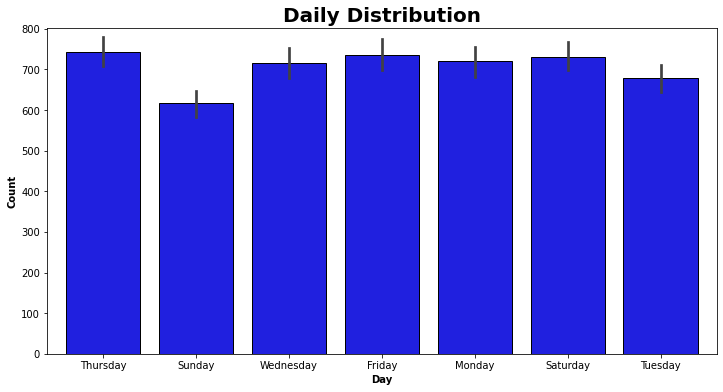

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data['day_name'], data['Rented Bike Count'], color='b', edgecolor='k')
plt.xlabel('Day',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Daily Distribution', fontweight='bold',fontsize=20)
plt.margins(0.03)
plt.show()

#**Weekend**

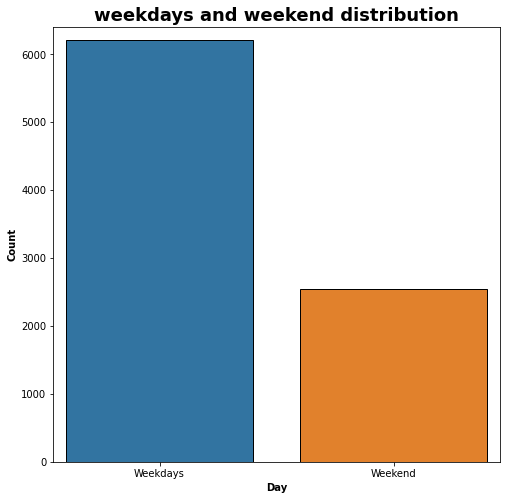

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data['weekdays_weekend'], edgecolor='k')
plt.xlabel('Day',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('weekdays and weekend distribution', fontweight='bold',fontsize=18)
plt.xticks([0,1],['Weekdays','Weekend'])
plt.margins(0.03)
plt.show()

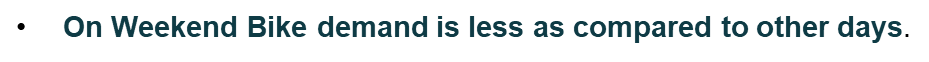

# **Functioning Day**

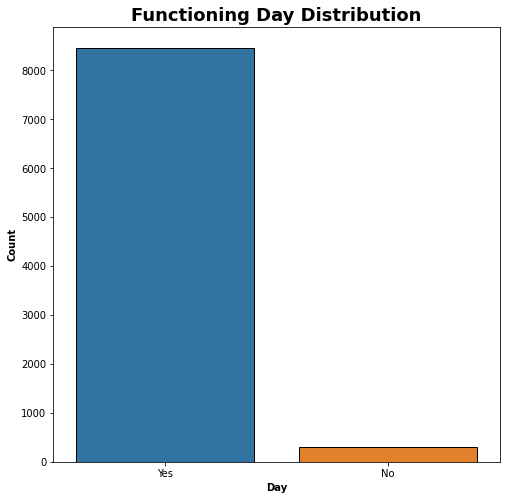

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data['Functioning Day'], edgecolor='k')
plt.xlabel('Day',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Functioning Day Distribution', fontweight='bold',fontsize=18)
plt.show()

**On Non-Functionality day almost no bike demand.**

In [ ]:
#drop
data = data.drop(columns = ['Date','day','day_name'], axis=1)

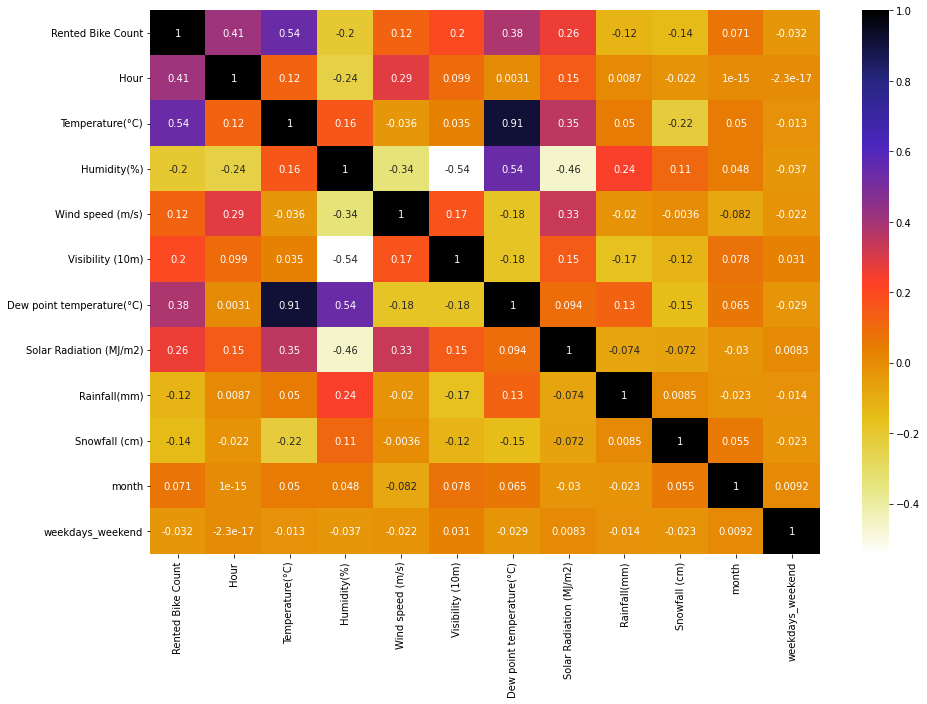

In [ ]:
#checking correlation with the help of heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='CMRmap_r')

Text(0.5, 1.0, 'Rented bike count')

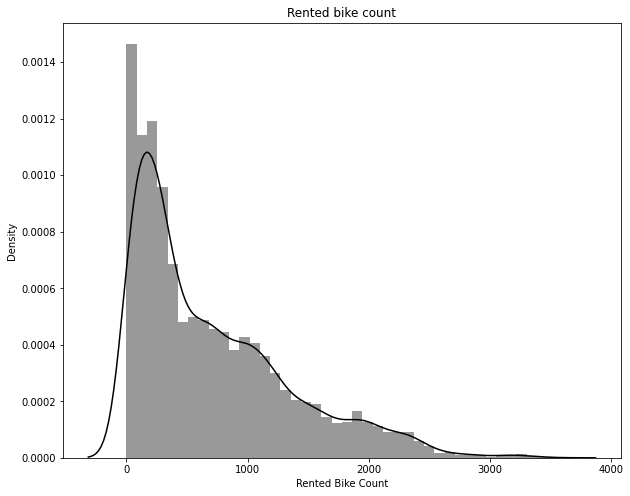

In [ ]:
#Rented bike count
plt.figure(figsize=(10,8))
sns.distplot(data['Rented Bike Count'], kde=True, color='k')
plt.title('Rented bike count')

Text(0.5, 1.0, 'Rented bike count square_root transformation')

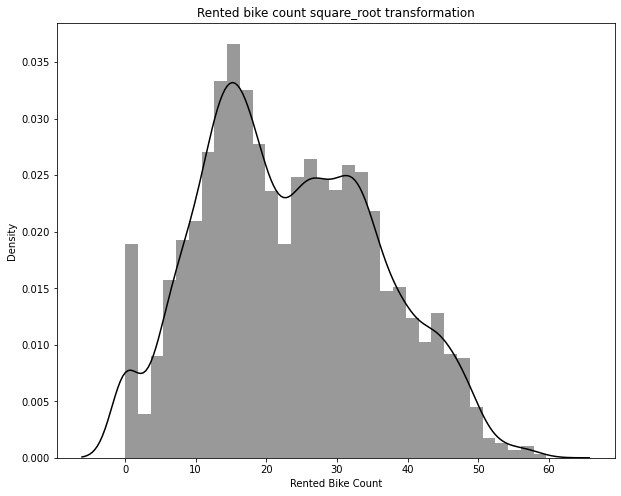

In [ ]:
#Rented bike count with square root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(data['Rented Bike Count']), kde=True, color='k')
plt.title('Rented bike count square_root transformation')

# **Plotting histogram for Numberic features**

In [ ]:
#extracting numeric features
numeric_features = data.select_dtypes(exclude='object')

In [ ]:
numeric_features.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0


<Figure size 576x432 with 0 Axes>

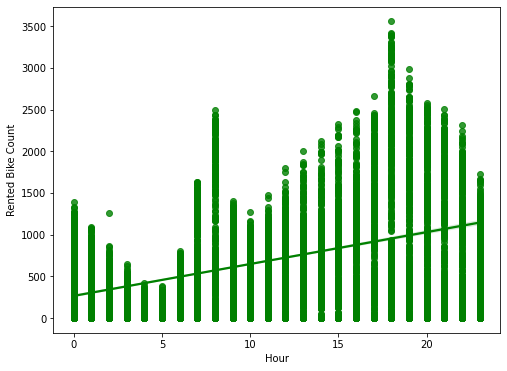

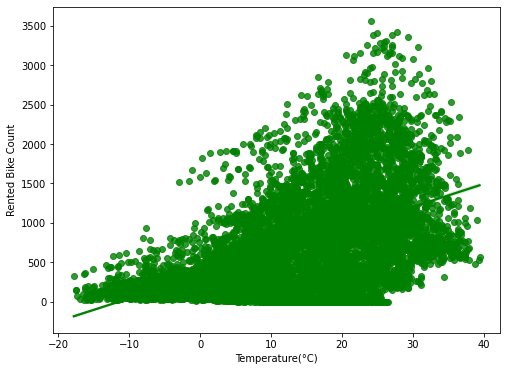

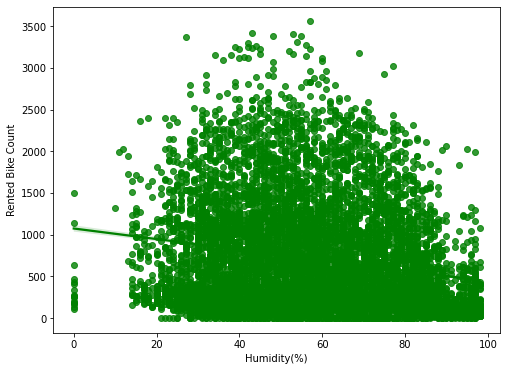

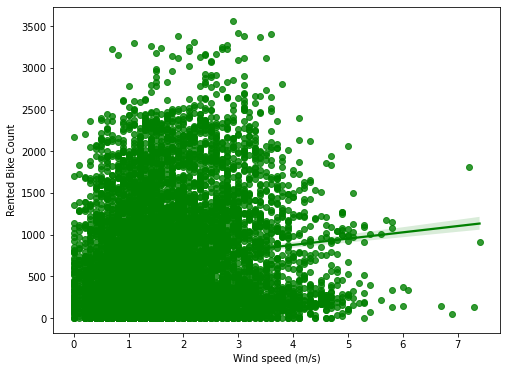

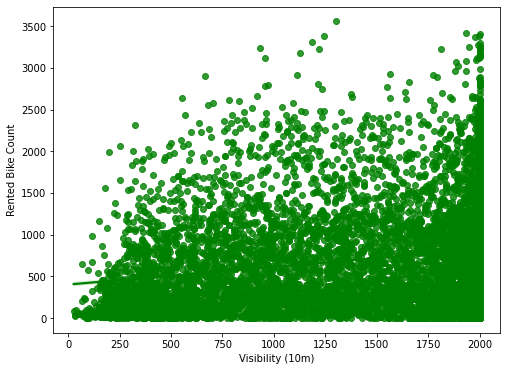

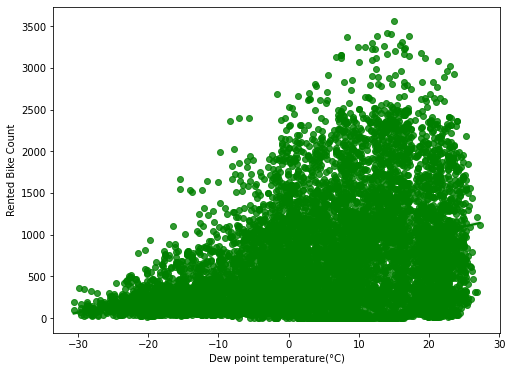

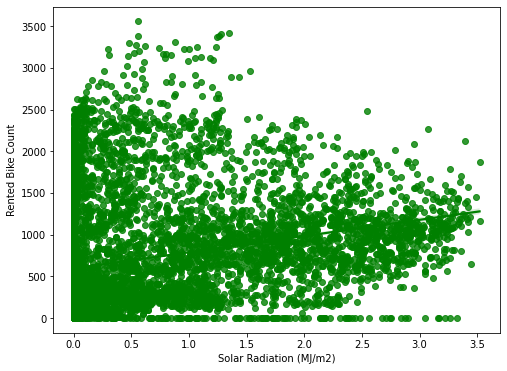

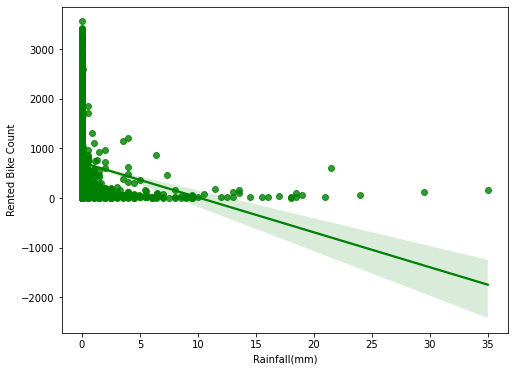

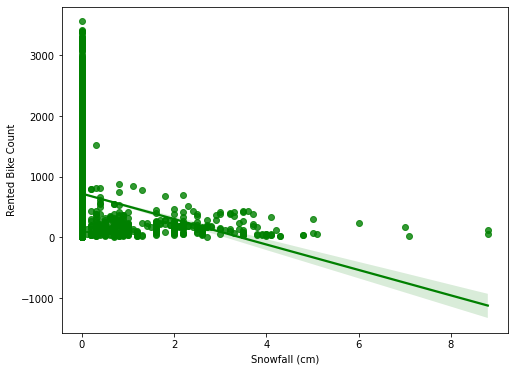

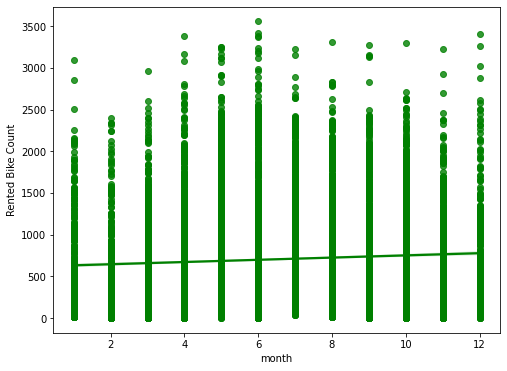

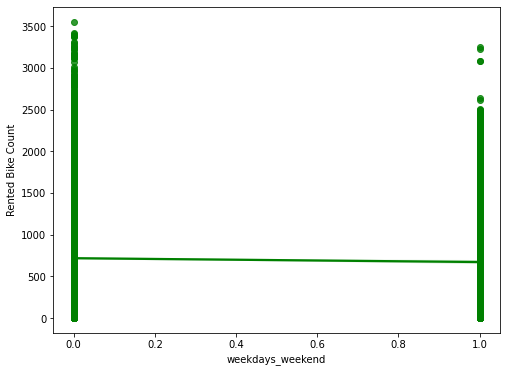

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns
for feature in numeric_features[:]:
  plt.figure(figsize=(8,6))
  if feature == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=data[feature],y=data["Rented Bike Count"],color='g')
  
  plt.show()


In [ ]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Seasons'] = encoder.fit_transform(data['Seasons'])
data['Holiday'] = encoder.fit_transform(data['Holiday'])
data['Functioning Day'] = encoder.fit_transform(data['Functioning Day'])

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,0


In [ ]:
data.shape

(8760, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  month                      8760 non-null   int64

In [ ]:
#independent variable
x = data.drop(['Rented Bike Count'], axis=1)

#dependent variable
y = np.sqrt(data['Rented Bike Count'])

**splitting the dataset into train_test_split**

In [ ]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error,mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6132, 14), (2628, 14), (6132,), (2628,))

# **1.Linear Regression**

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(x_train)
X_test = std.transform(x_test)

In [ ]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()
lr_model = lr_regressor.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([ 9.89630142, 29.76749266, 31.18075545, ..., 19.90252491,
       -6.99582981, 13.72056038])

In [ ]:
#examining scores
print('Training Score :', lr_model.score(X_train, y_train))
print('Validation Score :', lr_model.score(X_test, y_test))
print('Cross Validation Score :', cross_val_score(lr_model, X_train, y_train, cv=5).mean())

Training Score : 0.6509863889651326
Validation Score : 0.6584795946433057
Cross Validation Score : 0.6455061163757272


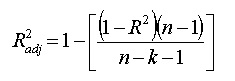

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
#Get metrics
MSE  = mean_squared_error(y_test,y_pred_lr)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lr)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)


MSE : 52.8228392761745
RMSE : 7.267932255887812
R2 : 0.6584795946433057
Adjusted R2 :  0.6566497876494314


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

In [ ]:
#optimized_model_lr = lr_model.best_estimator_
#optimized_model_lr

In [ ]:
#optimized_model_lr.coef

In [ ]:
#feature importance
#feature_importance = pd.DataFrame({'Features':X_train.columns, 'Importance':np.abs(optimized_model_lr.coef_).ravel()})

In [ ]:
#feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
'''
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(feature_importance['Features'],feature_importance['Importance'], order=feature_importance['Features'].value_counts().index, edgecolor='k')
plt.title('Feature importances via coefficients',fontweight='bold',fontsize=20)
plt.xticks(rotation = 60)
'''

"\n##importance of features via coefficients\nplt.figure(figsize=(12,8))\nsns.barplot(feature_importance['Features'],feature_importance['Importance'], order=feature_importance['Features'].value_counts().index, edgecolor='k')\nplt.title('Feature importances via coefficients',fontweight='bold',fontsize=20)\nplt.xticks(rotation = 60)\n"

Text(0.5, 1.0, 'Linear regression Test VS Prediction')

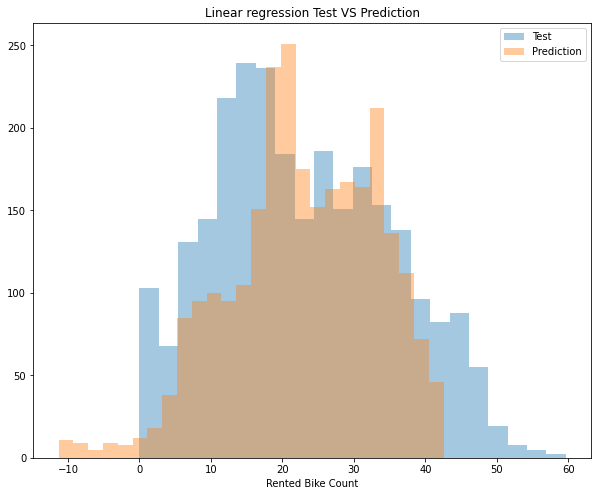

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_lr, kde=False, label="Prediction")
plt.legend()
plt.title("Linear regression Test VS Prediction")

# **Lasso Regression**

In [ ]:
#importing lasso regression
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso_model =lasso.fit(X_train,y_train)

**Parameter tunning for lasso regression**

In [ ]:

#setting the parameters of the lasso model
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_grid = lasso_grid.fit(X_train,y_train)

In [ ]:
lasso_grid.best_estimator_

Lasso(alpha=0.0014)

In [ ]:
lasso_grid.best_params_

{'alpha': 0.0014}

In [ ]:
y_pred_lasso = lasso_grid.predict(X_test)
y_pred_lasso

array([ 9.89293286, 29.76388803, 31.18976162, ..., 19.89862359,
       -6.98090074, 13.73270694])

In [ ]:
#Gets Metrics
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 52.822824005228206
RMSE : 7.267931205317522
R2 : 0.6584796933759721
Adjusted R2 :  0.6566498869110902


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'Lasso regression(Test VS Prediction)')

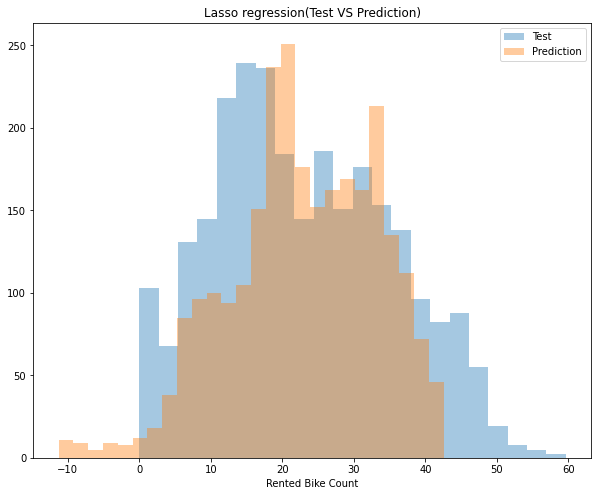

In [ ]:
#comparing test and predict
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_lasso, kde=False, label="Prediction")
plt.legend()
plt.title("Lasso regression(Test VS Prediction)")

## **Ridge Regression**

In [ ]:
#implementing ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_model = ridge.fit(X_train,y_train)

**parameter tuning**

In [ ]:
#setting the parameters of the ridge model
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_grid = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_grid = ridge_grid.fit(X_train,y_train)

In [ ]:
ridge_grid.best_params_

{'alpha': 5}

In [ ]:
ridge_grid.best_estimator_

Ridge(alpha=5)

In [ ]:
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_ridge

array([ 9.88287623, 29.74995848, 31.19610376, ..., 19.88085845,
       -7.03926554, 13.77779501])

In [ ]:
#Gets Metrics
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 52.83998650595776
RMSE : 7.269111809977733
R2 : 0.6583687310671222
Adjusted R2 :  0.6565383300854688


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'Ridge regression(Test VS Prediction)')

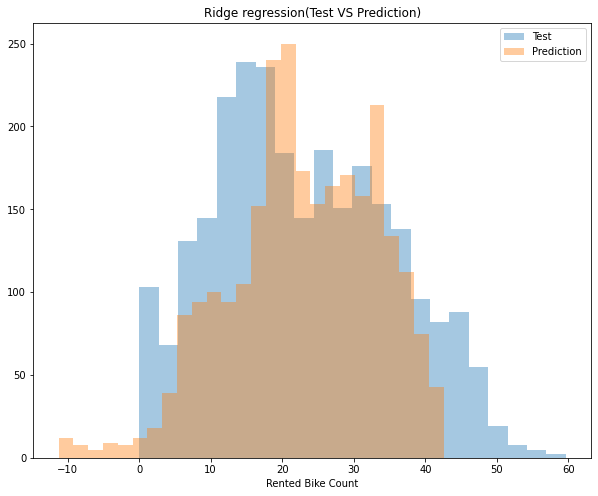

In [ ]:
#comparing test and predict
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_ridge, kde=False, label="Prediction")
plt.legend()
plt.title("Ridge regression(Test VS Prediction)")

# **Decision Tree Regression**

In [ ]:
#implementing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_model = dt_regressor.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([ 4.35889894, 33.43650699, 35.74912586, ..., 21.28379665,
       11.44552314, 10.58300524])

In [ ]:

#setting the parameters of the decision tree model

parameters = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
dt_grid = GridSearchCV(dt_model, parameters, scoring='neg_mean_squared_error', cv=5)
dt_grid = dt_grid.fit(X_train,y_train)


In [ ]:
dt_grid.best_estimator_


DecisionTreeRegressor(max_depth=20, min_samples_split=0.1)

In [ ]:
dt_grid.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [ ]:
y_pred_dt = dt_grid.predict(X_test)
y_pred_dt

array([ 9.9612168 , 28.97250482, 33.16556004, ..., 16.65559463,
       13.28787397, 16.65559463])

In [ ]:
#Get Metrics from decision tree regression
MSE  = mean_squared_error(y_test,y_pred_dt)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dt)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 34.45797658162553
RMSE : 5.870091701296116
R2 : 0.7772156458989099
Adjusted R2 :  0.7760220060376717


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'Decision Tree regression(Test VS Prediction)')

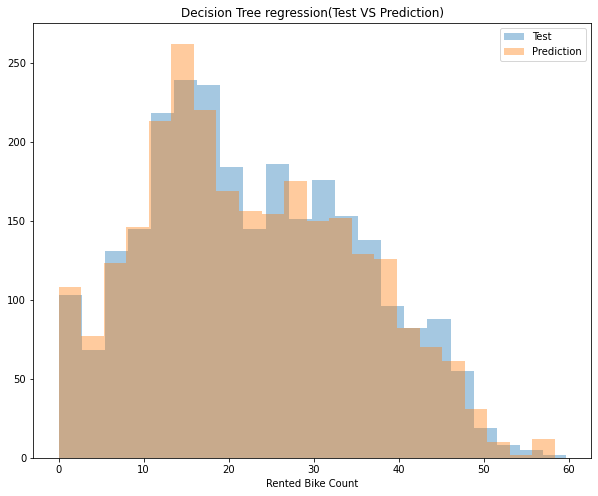

In [ ]:
#comparing test and predict
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_dt, kde=False, label="Prediction")
plt.legend()
plt.title("Decision Tree regression(Test VS Prediction)")

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=20, min_samples_split=0.1)

In [ ]:
dt_model.feature_importances_

array([0.21791703, 0.28574462, 0.11356569, 0.0119219 , 0.01396073,
       0.02397374, 0.0577839 , 0.03091364, 0.00088404, 0.06580164,
       0.00274961, 0.15185739, 0.01184268, 0.01108338])

In [ ]:
optimal_model_dt = dt_grid.best_estimator_

In [ ]:
#Feature importance for decision tree regression model 
feature_importance = pd.DataFrame({'Features':x_train.columns, 'Importance':np.abs(dt_model.feature_importances_).ravel()})

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)


In [ ]:
feature_importance

,Features,Importance
1,Temperature(°C),0.285745
0,Hour,0.217917
11,Functioning Day,0.151857
2,Humidity(%),0.113566
9,Seasons,0.065802
6,Solar Radiation (MJ/m2),0.057784
7,Rainfall(mm),0.030914
5,Dew point temperature(°C),0.023974
4,Visibility (10m),0.013961
3,Wind speed (m/s),0.011922


Text(0.5, 1.0, 'Feature importances(Decision Tree Regression)')

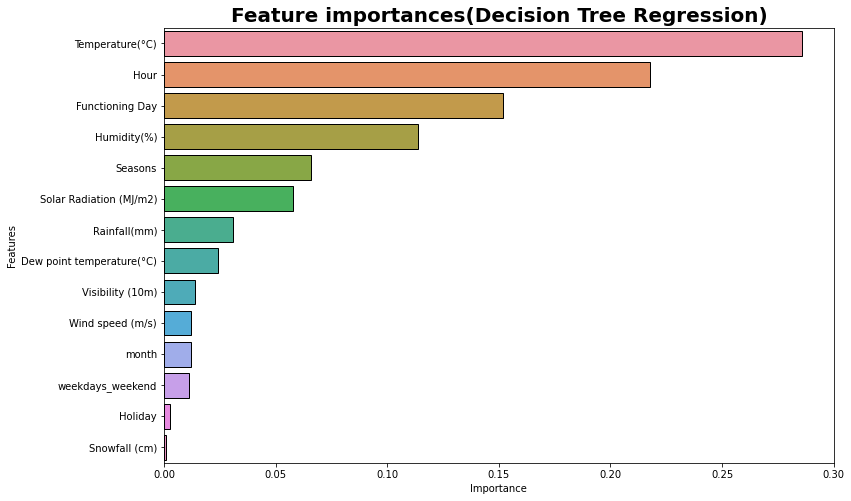

In [ ]:
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(y=feature_importance['Features'],x=feature_importance['Importance'], order=feature_importance['Features'].value_counts().index,orient='h', edgecolor='k')
plt.title('Feature importances(Decision Tree Regression)',fontweight='bold',fontsize=20)


# **Random Forest Regression**

In [ ]:

#Implementing Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)

**parameter tunning**

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0).fit(X_train,y_train)


In [ ]:
y_pred_rf = rf_grid.predict(X_test)
y_pred_rf

array([ 8.48238692, 29.24190983, 34.71074769, ..., 22.71150564,
        9.44266098,  7.46693979])

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=20, max_leaf_nodes=80, n_estimators=60)

In [ ]:
rf_grid.best_params_

{'max_depth': 20, 'max_leaf_nodes': 80, 'n_estimators': 60}

In [ ]:
rf_model.feature_importances_

array([0.22917276, 0.28971839, 0.09271569, 0.01203613, 0.01447531,
       0.02174778, 0.05092645, 0.05411774, 0.00136408, 0.05921699,
       0.00262287, 0.15132619, 0.01106847, 0.00949114])

In [ ]:
optimal_model_rf = rf_grid.best_estimator_

In [ ]:
#Gets metrics
MSE  = mean_squared_error(y_test,y_pred_rf)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 18.111270273809506
RMSE : 4.255733811437166
R2 : 0.8829035233585796
Adjusted R2 :  0.8822761407818556


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'Random forest regression (Test VS Prediction)')

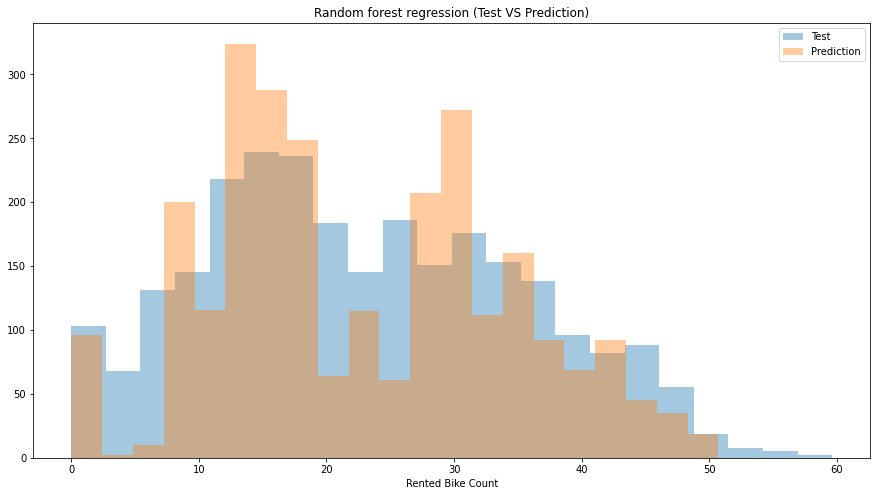

In [ ]:
#comparing test and predict result

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_rf, kde=False, label="Prediction")
plt.legend()
plt.title("Random forest regression (Test VS Prediction)")

In [ ]:
#Feature importance for decision tree regression model 
feature_importance = pd.DataFrame({'Features':x_train.columns, 'Importance':np.abs(rf_model.feature_importances_).ravel()})

In [ ]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)

In [ ]:
feature_importance

,Features,Importance
1,Temperature(°C),0.289718
0,Hour,0.229173
11,Functioning Day,0.151326
2,Humidity(%),0.092716
9,Seasons,0.059217
7,Rainfall(mm),0.054118
6,Solar Radiation (MJ/m2),0.050926
5,Dew point temperature(°C),0.021748
4,Visibility (10m),0.014475
3,Wind speed (m/s),0.012036


Text(0.5, 1.0, 'Feature importances(Random Forest Regression)')

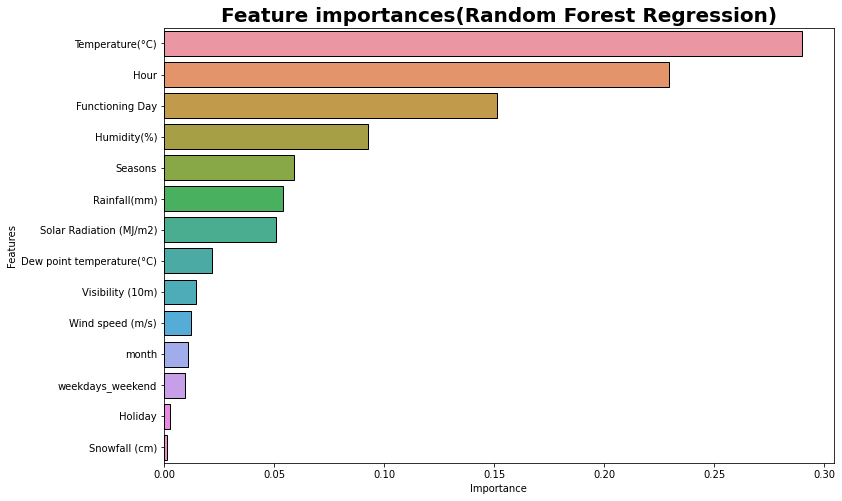

In [ ]:
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(y=feature_importance['Features'],x=feature_importance['Importance'], order=feature_importance['Features'].value_counts().index,orient='h', edgecolor='k')
plt.title('Feature importances(Random Forest Regression)',fontweight='bold',fontsize=20)


# **Gradient Boosting**

In [ ]:
#implementing gradient boosting model

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train, y_train)

**parameter tunning**

In [ ]:
# creating param dict to check diffirent value of parameter for gradient boosting
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:
y_pred_gb = gb_grid.predict(X_test)
y_pred_gb

array([ 6.10059427, 31.46465568, 35.7938233 , ..., 24.11783543,
       11.80223108,  5.87520398])

In [ ]:
gb_grid.best_params_

{'max_depth': 15, 'n_estimators': 100}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=15)

In [ ]:
optimal_model_gb = gb_grid.best_estimator_

In [ ]:
#Gets metrics
MSE  = mean_squared_error(y_test,y_pred_gb)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_gb)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 19.127721365092686
RMSE : 4.373525050241817
R2 : 0.8763317677794193
Adjusted R2 :  0.8756691748781227


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'Gradient boosting regression (Test VS Prediction)')

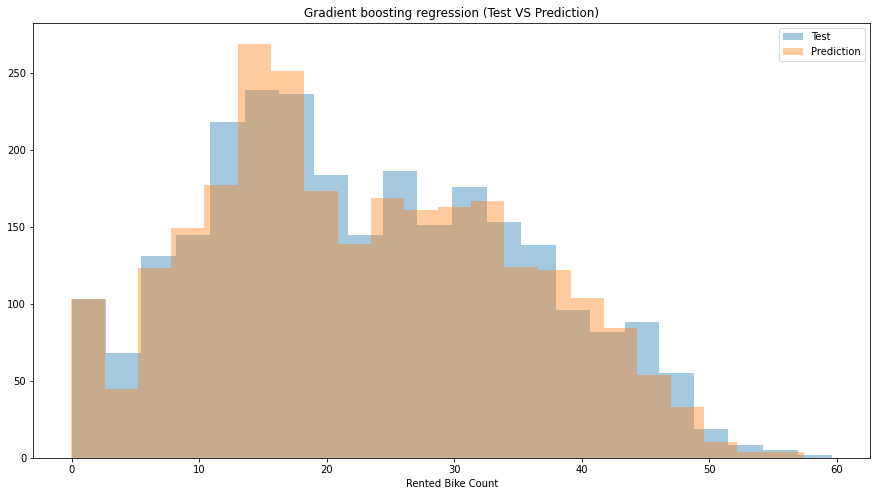

In [ ]:
#comparing test and predict result

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_gb, kde=False, label="Prediction")
plt.legend()
plt.title("Gradient boosting regression (Test VS Prediction)")

In [ ]:
#feature importance for gradient boosting model

feature_importance = pd.DataFrame({'Features':x_train.columns, 'Importance':np.abs(optimal_model_gb.feature_importances_).ravel()})


In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance

,Features,Importance
1,Temperature(°C),0.286106
0,Hour,0.218192
11,Functioning Day,0.151856
2,Humidity(%),0.113266
9,Seasons,0.066394
6,Solar Radiation (MJ/m2),0.057364
7,Rainfall(mm),0.031212
5,Dew point temperature(°C),0.024329
4,Visibility (10m),0.013078
12,month,0.012124


Text(0.5, 1.0, 'Feature importances(Gradient boosting regression)')

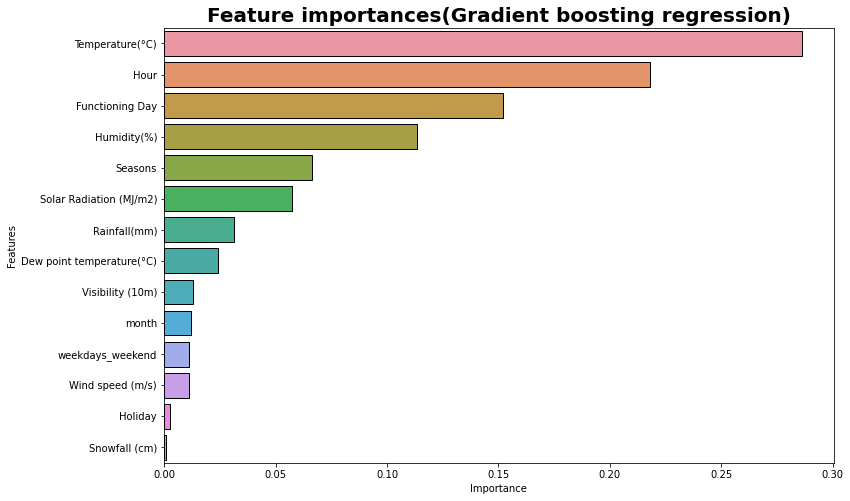

In [ ]:
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(y=feature_importance['Features'],x=feature_importance['Importance'], order=feature_importance['Features'].value_counts().index,orient='h', edgecolor='k')
plt.title('Feature importances(Gradient boosting regression)',fontweight='bold',fontsize=20)

## **XGBoost Regressor**

In [ ]:
#implementing XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_model = xgb.fit(X_train,y_train)

[07:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**parameter tunning**

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)
xgb_grid= xgb_grid.fit(X_train,y_train)

[07:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_xgb

array([ 6.872342 , 31.11721  , 35.88265  , ..., 21.686064 ,  5.0421214,
        5.0236444], dtype=float32)

In [ ]:
xgb_grid.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
xgb_grid.best_estimator_

XGBRegressor(max_depth=15, n_estimators=150)

In [ ]:
optimal_model_xgb = xgb_grid.best_estimator_

In [ ]:
#Gets metrics
MSE  = mean_squared_error(y_test,y_pred_xgb)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_xgb)
print("R2 :" ,r2)

adj_r2=1-(1-r2_score(y_test,y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 11.98309176162034
RMSE : 3.4616602608604357
R2 : 0.922524604660906
Adjusted R2 :  0.9221095049537696


In [ ]:
mean_sq_error.append(MSE)
root_mean_sq_error.append(RMSE)
r2_list.append(r2)
adj_r2_list.append(adj_r2)

Text(0.5, 1.0, 'XGBoost regression (Test VS Prediction)')

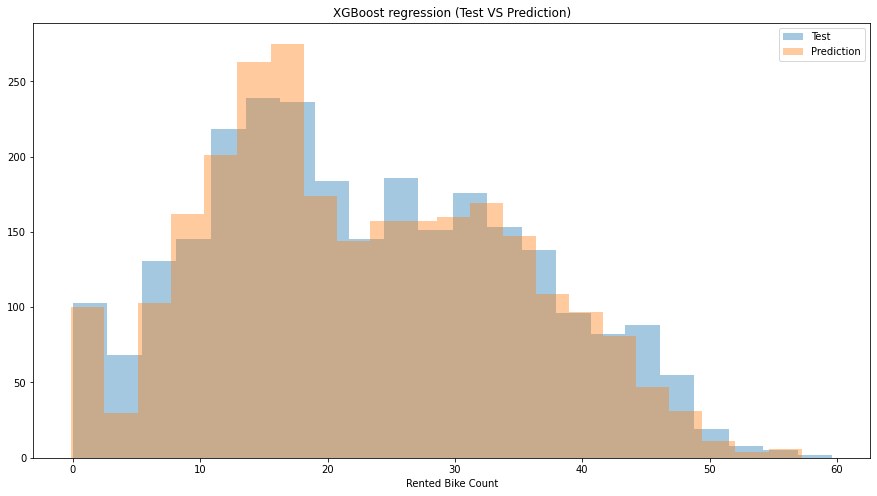

In [ ]:
#comparing test and predict result

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred_xgb, kde=False, label="Prediction")
plt.legend()
plt.title("XGBoost regression (Test VS Prediction)")

In [ ]:
#feature importance for XGBoost model

feature_importance = pd.DataFrame({'Features':x_train.columns, 'Importance':np.abs(optimal_model_xgb.feature_importances_).ravel()})

In [ ]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance

,Features,Importance
11,Functioning Day,0.801058
9,Seasons,0.077274
7,Rainfall(mm),0.058297
0,Hour,0.014906
1,Temperature(°C),0.014108
6,Solar Radiation (MJ/m2),0.010696
2,Humidity(%),0.008607
13,weekdays_weekend,0.004472
10,Holiday,0.004250
8,Snowfall (cm),0.001956


Text(0.5, 1.0, 'Feature importances()')

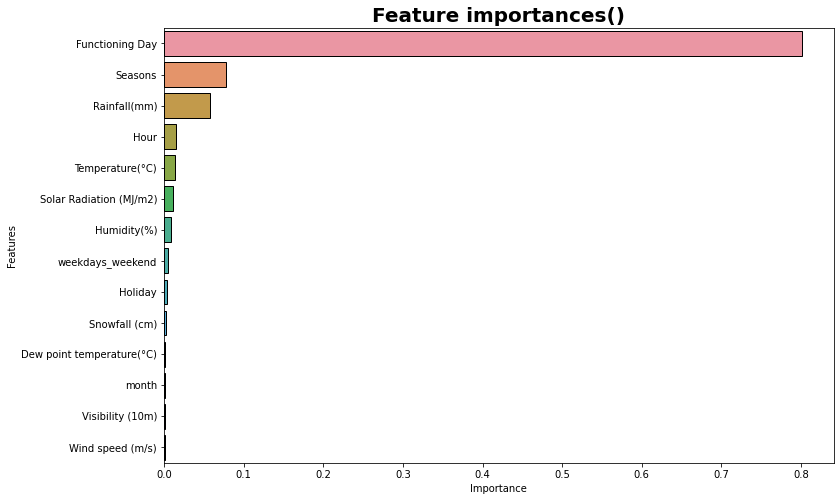

In [ ]:
##importance of features via coefficients
plt.figure(figsize=(12,8))
sns.barplot(y=feature_importance['Features'],x=feature_importance['Importance'], order=feature_importance['Features'].value_counts().index,orient='h', edgecolor='k')
plt.title('Feature importances()',fontweight='bold',fontsize=20)

# **Combined all Result**

In [ ]:
#creating dictionary to store all the metrices 
all_model_metrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

#list of all model 
model_name=['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression','XGBoost Regression']

#converting dictionary to dataframe
metrices_df=pd.DataFrame.from_dict(all_model_metrices,orient="index",columns=model_name)
metrices_df

,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree Regression,Random Forest Regression,Gradient Boosting Regression,XGBoost Regression
Mean_square_error,52.822839,52.822824,52.839987,27.502407,18.111270,19.127721,11.983092
Root_Mean_square_error,7.267932,7.267931,7.269112,5.244274,4.255734,4.373525,3.461660
R2,0.658480,0.658480,0.658369,0.822186,0.882904,0.876332,0.922525
Adjusted_R2,0.656650,0.656650,0.656538,0.821233,0.882276,0.875669,0.922110


In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_metrices=metrices_df.transpose().reset_index().rename(columns={'index':'Models'})
final_metrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear Regression,52.822839,7.267932,0.658480,0.656650
1,Lasso Regression,52.822824,7.267931,0.658480,0.656650
2,Ridge Regression,52.839987,7.269112,0.658369,0.656538
3,Decision Tree Regression,27.502407,5.244274,0.822186,0.821233
4,Random Forest Regression,18.111270,4.255734,0.882904,0.882276
5,Gradient Boosting Regression,19.127721,4.373525,0.876332,0.875669
6,XGBoost Regression,11.983092,3.461660,0.922525,0.922110


[Text(0, 0, 'Linear\nRegression'),
 Text(0, 0, 'Lasso\nRegression'),
 Text(0, 0, 'Ridge\nRegression'),
 Text(0, 0, 'Decision Tree\nRegression'),
 Text(0, 0, 'Random Forest\nRegression'),
 Text(0, 0, 'Gradient Bootsing\nRegression'),
 Text(0, 0, 'XGBoost\nRegression')]

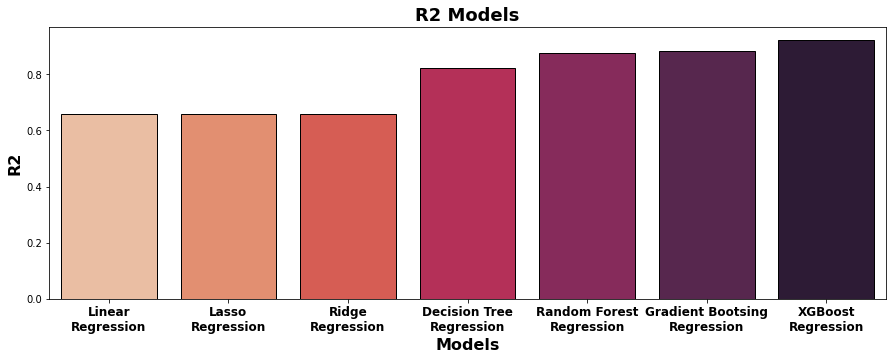

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(15,5))
sns.barplot(x='Models',y='R2',data=final_metrices.sort_values('Adjusted_R2'),palette='rocket_r', edgecolor='k')
plt.title('R2 Models', fontsize=18, fontweight='bold')
ax = plt.subplot()
LabelsList1 = ['Linear\nRegression','Lasso\nRegression','Ridge\nRegression','Decision Tree\nRegression','Random Forest\nRegression','Gradient Bootsing\nRegression','XGBoost\nRegression']
ax.set_xlabel('Models',fontweight='bold',fontsize=16)
ax.set_ylabel('R2',fontweight='bold',fontsize=16)
ax.xaxis.set_ticklabels(LabelsList1,fontweight='bold',fontsize=12)

In [ ]:
import pickle

In [ ]:
#save the model
filename = 'Bike Sharing Demand Predition.sav'
pickle.dump(xgb_grid,open(filename,'wb'))

In [ ]:
#loading save model
loaded_model = pickle.load(open('Bike Sharing Demand Predition.sav','rb'))

[07:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# **Conclusion**

* As we can see the total amount of bike rentals increases with the
temperature per month. Whereas it seems that the rentals are
independent of the wind speed and the humidity, because they are
almost constant over the months. This also confirms on the one hand
the high correlation between rentals and temperature and on the other
hand that nice weather could be a good predictor. So people mainly rent
bikes on nice days and nice temperature. This could be important of
planning new bike rental stations. 

* It is quite evident from the results that XGBoost is the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2 = 92 %) show a higher value for the XGBoost model. So, finally this model is best for predicting the bike rental count on daily basis.
